In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#노트북 안에 그래프를 그리기 위해
%matplotlib inline
plt.style.use('ggplot')
mpl.rcParams['axes.unicode_minus'] = False


In [4]:
train = pd.read_csv('data/train.csv', parse_dates=["datetime"])
#parse_Date => date형식으로 가져옴
train.shape

(10886, 12)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [9]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


* windspeed 같은 경우 0이 많은데 아마 제대로 측정되지 않았을 거라고 예측
* 이걸 어떻게 처리하냐에 따라 결과가 달라질 수 있을 것 같다.

In [11]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [15]:
#null데이터 확인
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

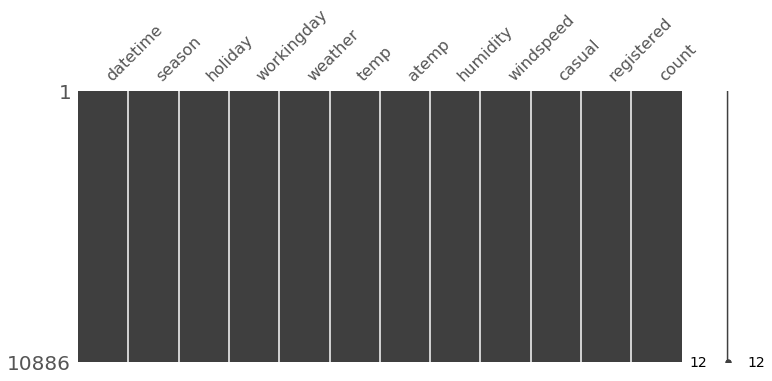

In [21]:
#null 데이터 시각적으로 확인
#!pip install missingno
import missingno as msno
msno.matrix(train,figsize=(12,5))

In [27]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train.shape
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0.5, 0, 'hour'), Text(0.5, 1.0, '시간별대여량')]

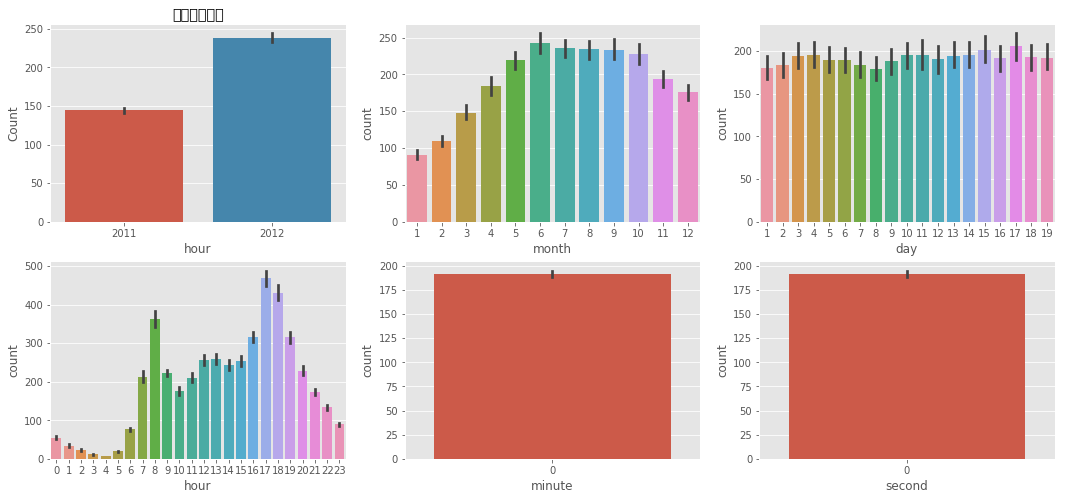

In [44]:
#map alias 지정하기
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
#도화지 크기
figure.set_size_inches(18,8)

sns.barplot(data = train, x="year", y="count", ax = ax1 )
sns.barplot(data=train, x="month", y = "count", ax = ax2)
sns.barplot(data = train, x="day", y="count", ax = ax3 )
sns.barplot(data=train, x="hour", y = "count", ax = ax4 )
sns.barplot(data = train, x="minute", y="count", ax = ax5 )
sns.barplot(data=train, x="second", y = "count", ax = ax6 )

ax1.set(ylabel = 'Count', title = "연도별대여량")
ax1.set(xlabel = 'month', title = "월별대여량")
ax1.set(xlabel = 'day', title = "일별대여량")
ax1.set(xlabel = 'hour', title = "시간별대여량")

* 연도별 대여량 2011 < 2012
* 월별 대여량은 6월에 가장 많고 7~10월도 대여량이 많다. 그리고 1월에 가장 적다.
* 일별 대여량은 1~19일까지 있고, 나머지 날짜는 test.csv에 있다. 이 데이터는 피처로 사용하면 안된다.
* 시간 대 대여량을 보면 출퇴근 시간에 대여량이 많은 것 같다. 하지만 주말과 나누어 볼 필요가 있다.
* 분,초도 다 0이기떄문에 의미가 없다.


[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, '근무일 여부에 따른 대여량')]

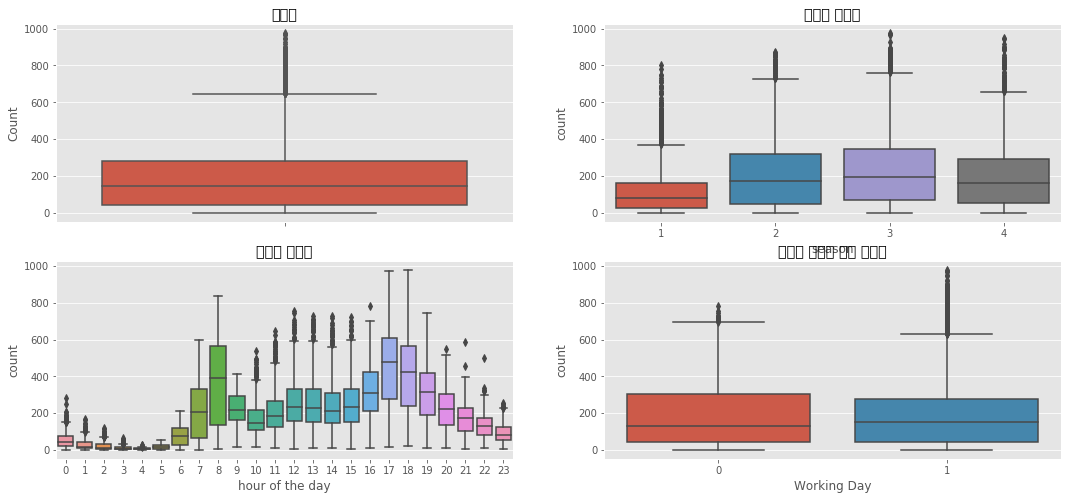

In [60]:
#fig, ((ax1,ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(18,8)
# sns.boxplot(data =train, y="count", ax = ax1)
# sns.boxplot(data =train, x="season",y="count", ax = ax2)
# sns.boxplot(data =train, x="hour",y="count", ax = ax3)
# sns.boxplot(data =train, x="workingday",y="count", ax = ax4)
sns.boxplot(data =train, y="count", orient="v", ax=axes[0][0])
sns.boxplot(data =train, x="season",y="count", orient="v", ax=axes[0][1])
sns.boxplot(data =train, x="hour",y="count", orient="v", ax=axes[1][0])
sns.boxplot(data =train, x="workingday",y="count", orient="v", ax=axes[1][1])

axes[0][0].set(ylabel='Count',title='대여량')
axes[0][1].set(xlabel='season',ylabel='count',title='계절별 대여량')
axes[1][0].set(xlabel='hour of the day',ylabel='count',title='시간별 대여량')
axes[1][1].set(xlabel='Working Day',ylabel='count',title='근무일 여부에 따른 대여량')



* 대여량을 봤을때는 특정 구간에 몰려 있는 것을 볼 수 있다.
* 계절별로 여름, 가을에 가장 많다.
* 출퇴근 시간
* 근무일 < 휴일 

In [63]:
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 19)

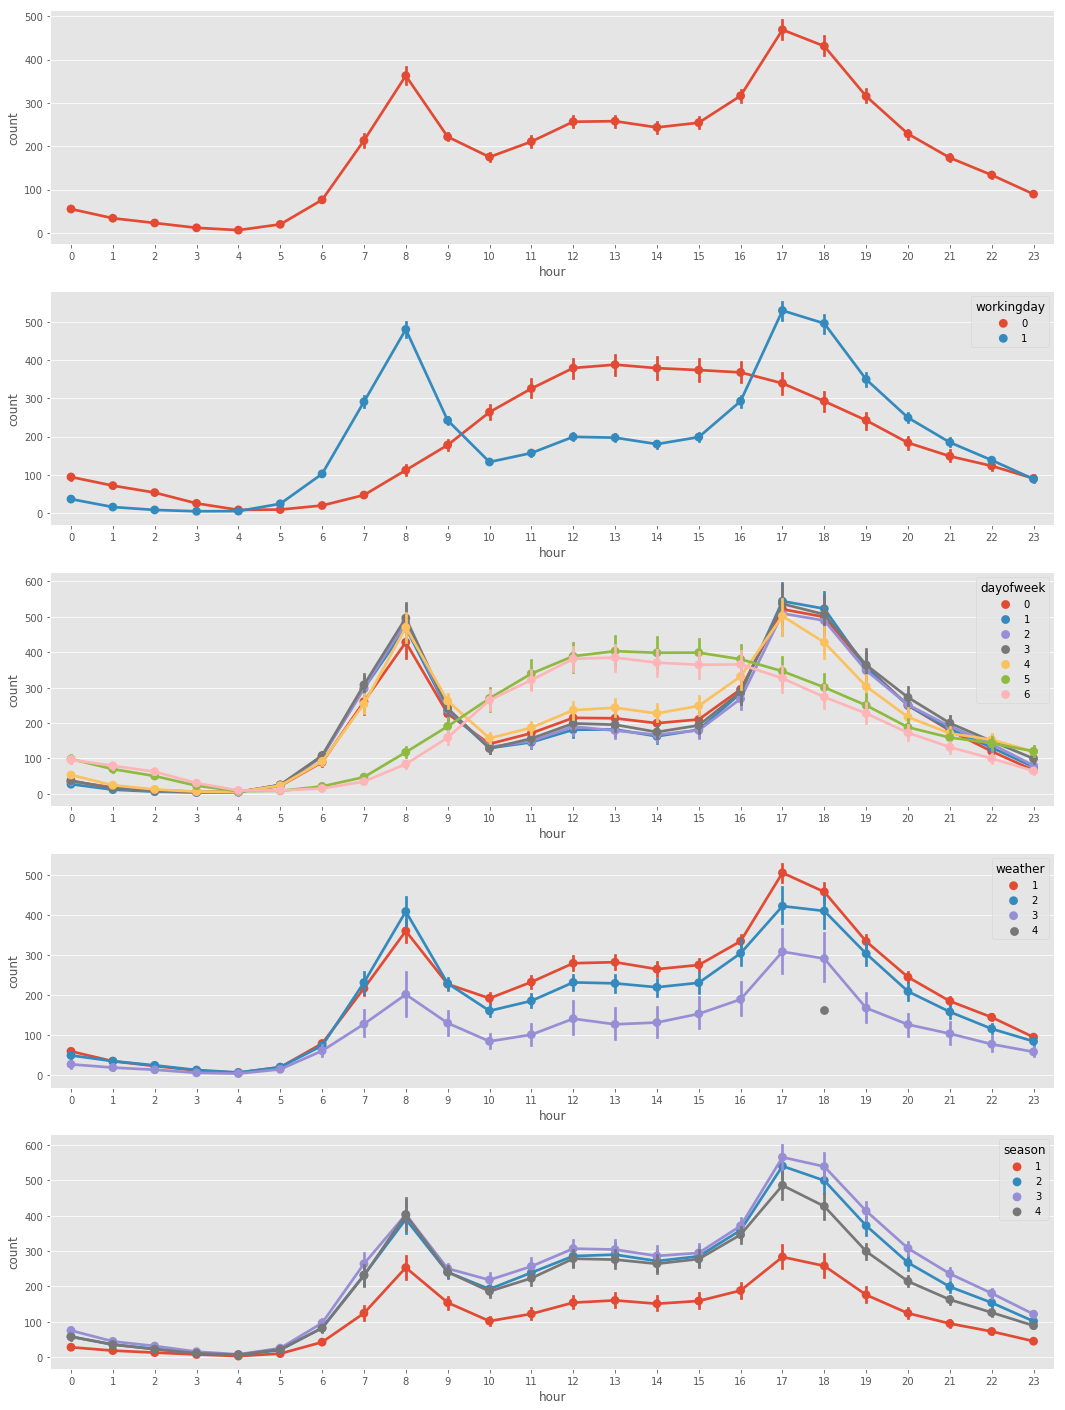

In [66]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)
sns.pointplot(data=train, x="hour", y="count", ax = ax1 )
sns.pointplot(data=train, x="hour", y="count", hue = "workingday", ax = ax2 )
sns.pointplot(data=train, x="hour", y="count", hue = "dayofweek", ax = ax3 )
sns.pointplot(data=train, x="hour", y="count", hue = "weather", ax = ax4 )
sns.pointplot(data=train, x="hour", y="count", hue = "season", ax = ax5 )

* 5,6이 토일
* 날씨별 -> 1--좋음 ------ 나쁨---4
* 계절 -> 봄에 가장 적다 (봄여름가을겨울)

In [71]:
#연관관계 찾기
corrMatt = train[[ "temp", "atemp", "casual", "registered", "humidity", "windspeed", "count" ]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


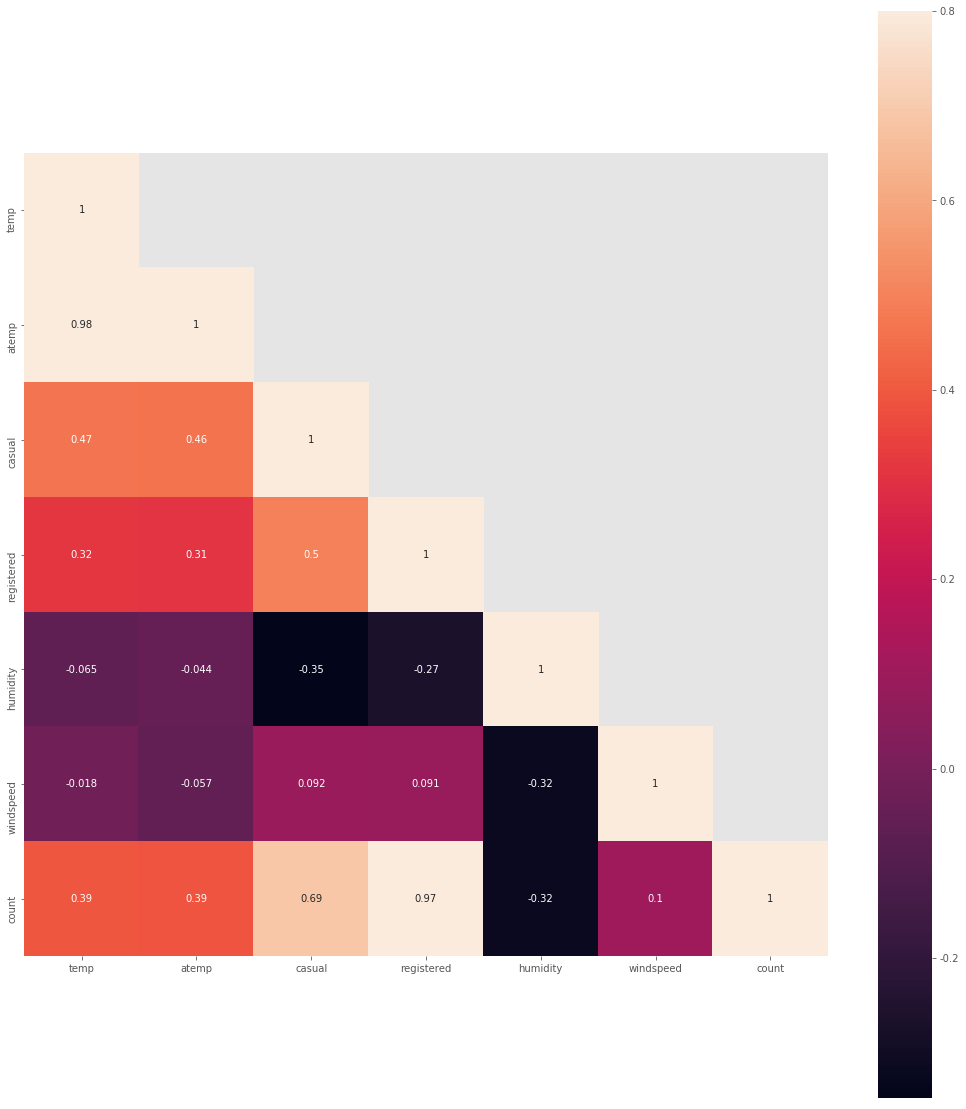

In [77]:
fig, ax = plt.subplots()
fig.set_size_inches(18,20)

sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

* 온도, 습도, 풍속은 거의 연관관계가 없다.
* 대여량과 가장 연관이 높은건, casual(등록되지 않은 사용자), registered(등록된 대여자)가 많지만, test에는 이 값이 없다.
* atemp와 temp는 0.98로 상관관계 높지만 체감온도-온도이므로 피처로 적합하지 않다.
* 남은것은 temp, atemp, windspeed

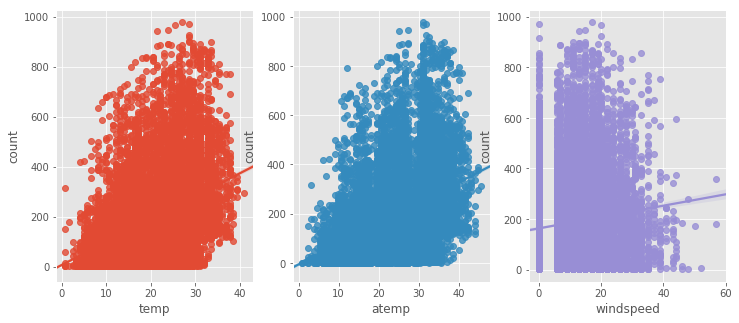

In [79]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)
#산점도
sns.regplot(x="temp", y="count", data=train,ax=ax1)
sns.regplot(x="atemp", y="count", data=train,ax=ax2)
sns.regplot(x="windspeed", y="count", data=train,ax=ax3)

* 풍속의 경우 0에 몰려있는 값들은 아마 관측되지 않은 수치로 보이므로,
  조정을 해주어야 하는 값이다.
  

In [83]:
#2011년부터 2012년까지 월별 데이터로 보기
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["year_month"] = train["datetime"].apply(concatenate_year_month)
print(train.shape)
train[["datetime","year_month"]].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


* return "{0}-{1}".format(datetime.year, datetime.month)
{0}-{1} 요부분 ★★★★
   

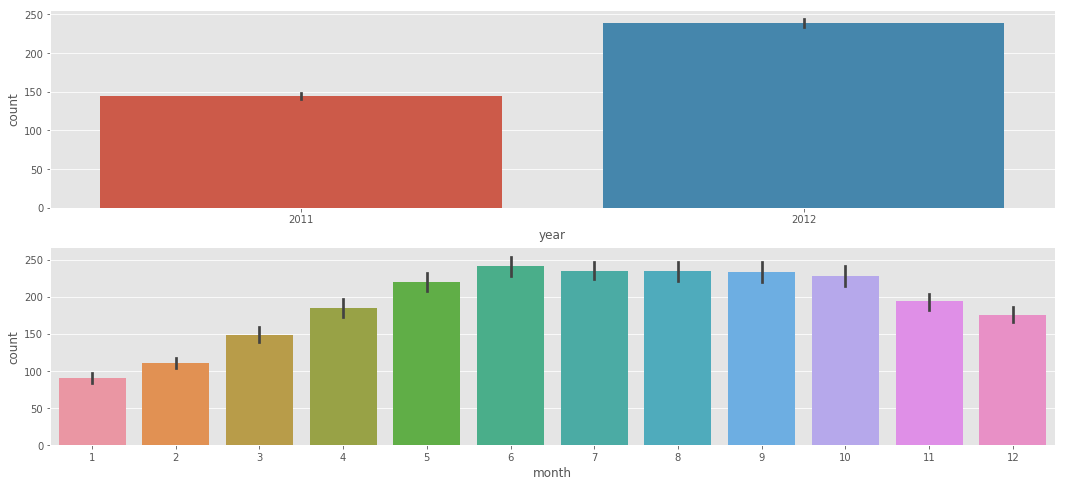

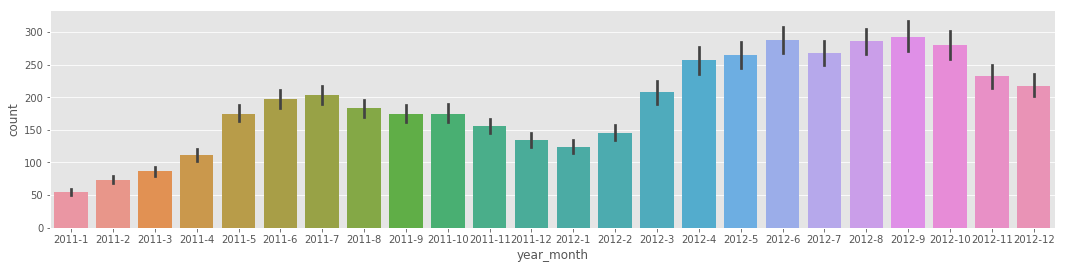

In [92]:
fig, ax = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(18,8)

sns.barplot(data=train, x="year", y="count", ax = ax[0])
sns.barplot(data=train, x="month", y="count", ax = ax[1])

sns.barplot(data=train, x="year_month", y="count", ax = ax3)
fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,4)

sns.barplot(data=train, x="year_month", y="count", ax = ax3)

* 2011-2012를 이어본 결과 전체적으로 증가하는 추세임을 알 수 있다.

In [98]:
#outlier 데이터 제거
trainWithoutOutliers = train[np.abs(train["count"] - train["count"].mean()) <= (3*train["count"]).std()]
#std : 표준편차

print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909612))

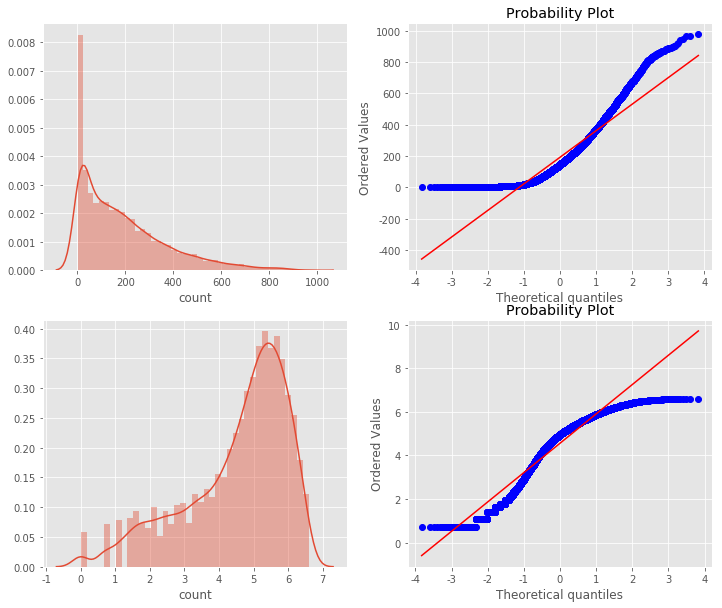

In [103]:
fig, axes = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(12,10)

sns.distplot(train["count"], ax = axes[0][0])
stats.probplot(train["count"], dist='norm', fit=True, plot=axes[0][1])

sns.distplot(np.log(trainWithoutOutliers["count"]), ax = axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])

* count 변수가 오른쪽에 치우쳐져 있다. 대부분의 기계학습은 종속변수가 normal이어야하기에 정규분포를 갖는 것이 바람직하다. 대안으로 outlier data를 제거하고 "count"변수에 로그를 씌어 변경해봐도 정규분포를 따르지는 않지만 이전 그래프 보다는 자세히 표현하고 있다.